In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..', 'shared')))
import setup_code
stroke_data = setup_code.stroke_data

# Data visualization with matpotlib and seaborn


To get started, in your jupyter notebook or your python environment, import the necessary packages:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Explore the dataset

First, let's explore the dataset. If you are running this locally, make sure to import the dataset first, paying attention to the path of your file.

In [3]:
#Display the first 5 rows of the dataset
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## A little bit of data preprocessing

If you check the dataframe with the following code, you will see there are missing values in the bmi.

In [4]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

You should have learned how to handle missing values in module 4. For simplicity, we will replace the missing values with the mean.

In [5]:
### getting the bmi mean for non-null values
bmi_mean = stroke_data[~stroke_data['bmi'].isna()]['bmi'].mean()

In [6]:
### filling the missing bmi values with the mean
na_index = stroke_data[stroke_data['bmi'].isna()].index
stroke_data.loc[na_index, 'bmi'] = bmi_mean

If we check again, there should be no missing values now.

In [7]:
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Matplotlib and histogram

Let's start simple and try and plot a histogram. For example, if you want to check the distribution of a column e.g. avg_glucose_level, you can do so using a histogram with the following codes:

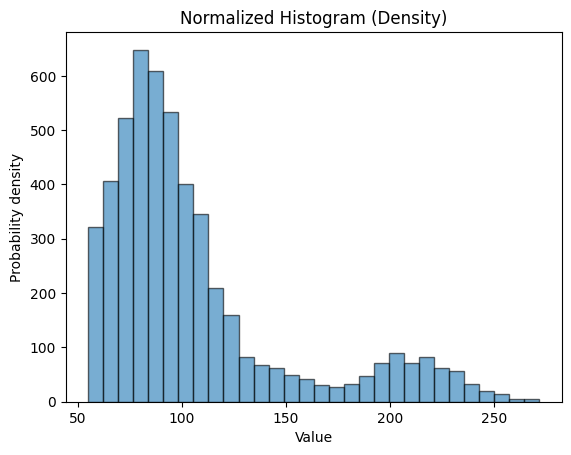

In [8]:
plt.hist(stroke_data.avg_glucose_level, bins=30, alpha=0.6, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.title('Normalized Histogram (Density)')
plt.show()

We used the function `plt.hist()` from the matplotlib pacakge to make the plot. And we input the data from the dataframe `stroke_data.avg_glucose_level` as the first argument. The argument `bins` will control how many bins you want, the higher the number the more bins there are. `alpha` allows you to change the transparency of the bins. `black` will add outlines to the bins.

`plt.xlabel()` and `plt.ylabel()` will set the labels of your x-axis and y-axis respectively. `plt.title()` will set the title of the plot. Finally `plt.show()` will actually display the plot.

If you want to know more about the `matplotlib.pyplot.hist()` function and its arguments, go to the [matplotlib documentation](https://matplotlib.org/stable/)

### Changing font size and plot size

While we have the fairly simple example of the histogram, let's try and change the fonts of the plot.

What we will change:
1. size of the plot
2. font size of the x-axis and y-axis label
3. font size of ticks on the x and y-axis


Here is how you can do this:

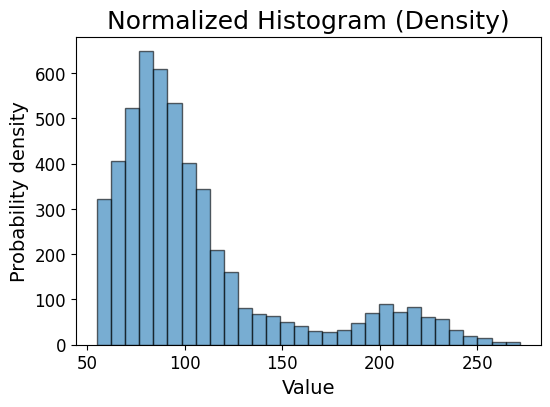

In [9]:
plt.figure(figsize=(6, 4))
plt.hist(stroke_data.avg_glucose_level, bins=30, alpha=0.6, edgecolor='black')
plt.xlabel('Value', fontsize=14)
plt.ylabel('Probability density',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Normalized Histogram (Density)', fontsize=18)
plt.show()

As you can see, it is quite straight forward. We just have to add the argument `fontsize` in some functions, the number indicate how big you want the font to be (the higher the bigger). 
The `plt.figure()` function was added at the beginning to control the size of the plot. The two numbers 6 and 4 tell python that I want the plot to be 6 inches wide and 4 inches high.

### Saving the plot

Now that you have a beautiful figure, you might want to save it. You can do so by using this function `plt.savefig()`. Several formats are supported, most commonly PDF, PNG and JPEG. 

You can save the figure by typing:

In [10]:
plt.savefig('avg_glucose_level_histogram.pdf', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

`avg_glucose_level_histogram.pdf` is the file name you want to save as, the extension `.pdf` tells python what format you want to save as. Use `.png` if you want PNG or `.jpg` if you want JPEG. 

`dpi` controls the resolution, the higher the number, the higher the resolution. `bbox_inches` tells python to get rid of the extra white space around the plot. 

If you just want to save the figure, replace `plt.show()` with `plt.savefig()`. If you want to save AND display the figure, make sure to put `plt.savefig()` before `plt.show()`. 

## Seaborn and scatter plot

We will now try to make a scatter plot. We will also use a new package [seaborn](https://seaborn.pydata.org/). According to the documentation, `seaborn` 'builds on top of matplotlib and integrates closely with `pandas` data structures'.

Let us plot a scatter plot of bmi vs age by using the following codes:

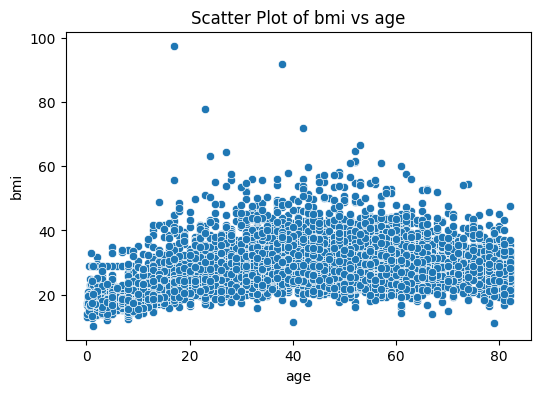

In [11]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=stroke_data, x='age', y='bmi')
plt.title('Scatter Plot of bmi vs age')
plt.show()

We used the function `sns.scatterplot()` from the `seaborn` package. Here we can put the entire dataframe as the input, then we specify the columns on in the dataframe that we want as x-axis and y-axis like so: `x='age', y='bmi'`

An advantage of using `seaborn` is that, we do not have to explicitly set axis labels, it is automatically done. You can stll do it if you want to customize them.

### Color

If you want to display another information on the scatter plot, you can try by adding color to it. We can do this by adding an argument to the function like so:

<Axes: xlabel='age', ylabel='bmi'>

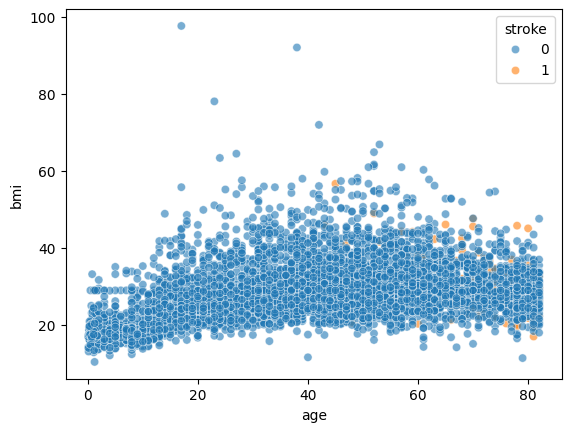

In [12]:
sns.scatterplot(data=stroke_data, x='age', y='bmi', hue='stroke', alpha=0.6)

By adding `hue='stroke`, we are telling `seaborn` to color the dots in the scatter plot according to the information in the 'stoke' column.

However, if you try the line of code above you will find that the dots are overlapping and we can not visualize the color well.

We can try specifying the order of which the dots are plotted for better visualization. The codes are:

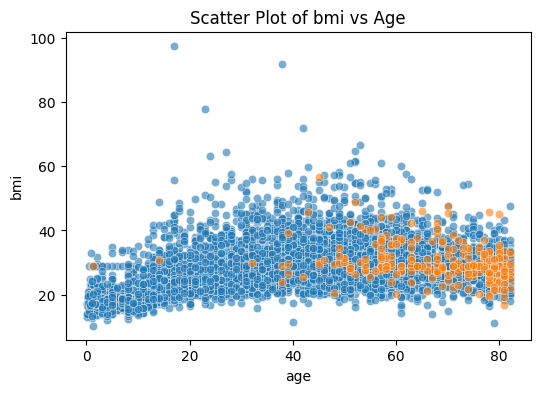

In [13]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=stroke_data[stroke_data['stroke']==0], x='age', y='bmi', alpha=0.6)
sns.scatterplot(data=stroke_data[stroke_data['stroke']==1], x='age', y='bmi', alpha=0.6)
plt.title('Scatter Plot of bmi vs Age')
plt.show()

### Multiple plots

Now, what if you have multiple plots and you want them side by side for comparison? You can do so by using the `plt.subplot()` function.

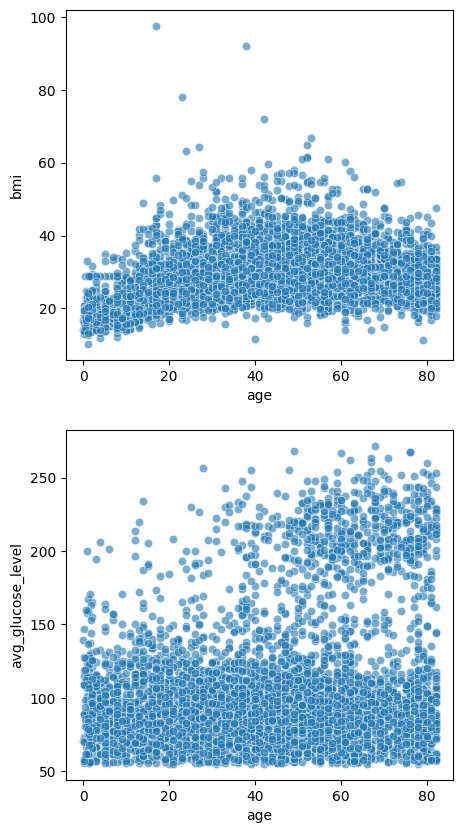

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(5, 10))
sns.scatterplot(data=stroke_data, x='age', y='bmi', alpha=0.6, ax=axes[0])
sns.scatterplot(data=stroke_data, x='age', y='avg_glucose_level', alpha=0.6, ax=axes[1])
plt.show()

The first argument 2 tells `plt.subplots()` how many rows you want to organize the subplots, and the 1 means you want only 1 column. We used the `sns.scatterplot()` function twice to plot 2 figures, and we and the argument `ax=` to tell `seaborn` where to display the subplots excatly. The rest is the same as the single figures above.

If the figures have the same axis label and ticks, we can make them share the same ones to save space. And just like before, we can set the titles as well:

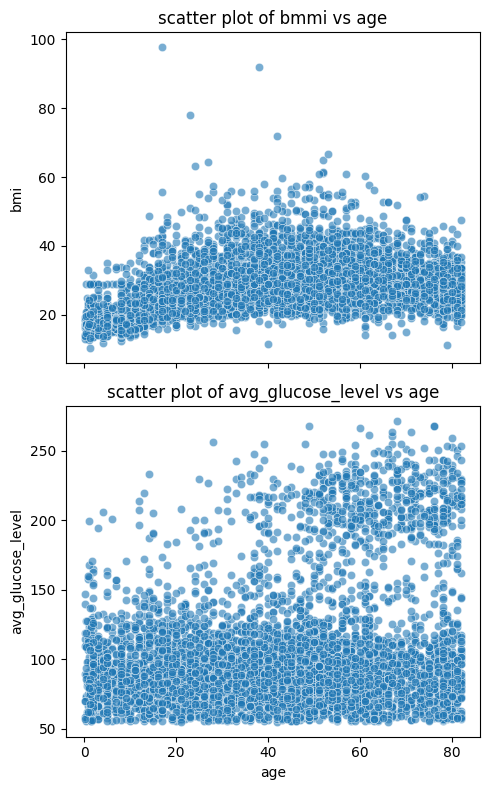

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(5, 8), sharex=True)
sns.scatterplot(data=stroke_data, x='age', y='bmi', alpha=0.6, ax=axes[0])
axes[0].set_title('scatter plot of bmmi vs age')
sns.scatterplot(data=stroke_data, x='age', y='avg_glucose_level', alpha=0.6, ax=axes[1])
axes[1].set_title('scatter plot of avg_glucose_level vs age')
plt.tight_layout()
plt.show()

As you can see, we added the argument `sharex=True` to the function `plt.subplots()` to tell python the subplots are sharing the x-axis. We also added the optional `plt.tight_layout()` to reduce spacing between the plots and improve the overall aethestic.

## Seaborn and distribution visualization

If you think that the histogram is not enough to visualize the distribution, you might want to try box plot and violin plot. You can use the `seaborn` package for that. Using `seaborn` you can visualize another information in the figure by using color.

### Box plot

We simply use the `sns.boxplot()` function to do the boxplot. 

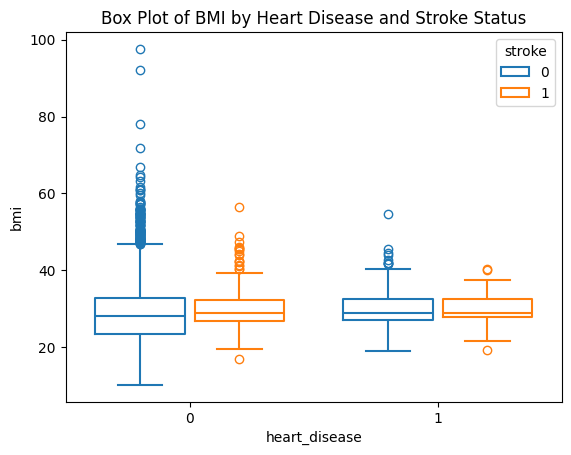

In [16]:
sns.boxplot(data=stroke_data, x="heart_disease", y="bmi", hue="stroke", fill=False, gap=.1)
plt.title('Box Plot of BMI by Heart Disease and Stroke Status')
plt.show()

With the box plot, we can identify the outliers more easily. `fill=False` will tell `seaborn` not to fill solid color inside the boxes, `gagp=.1` is the gap between the boxes for each category of the x axis.

### Violin plot

If you want to visualize the distributions another way, you might want to try violin plots. We will use `sns.violinplot()`.

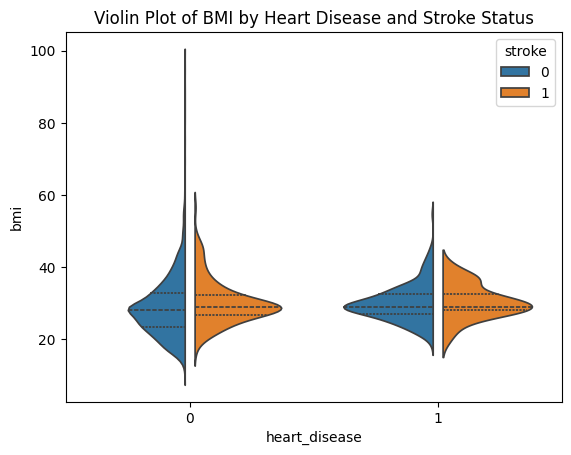

In [17]:
sns.violinplot(data=stroke_data, x="heart_disease", y="bmi", hue="stroke", split=True, gap=.1, inner="quart")
plt.title('Violin Plot of BMI by Heart Disease and Stroke Status')
plt.show()

If you use the argument `split=True`, only half of the violins will be plotted for easier comparison. `inner="quart"` means quantiles of the data will be shown inside the violins, you may also choose `inner="box"` to display box-and-whisker plot.

## Visualizing correlation

### Pairplot

We can plot pairwise scatterplots to try and see if there is any correlations that exist between any pair of variables. This is only a preliminary visualization, but it is a good place to start. We will use `seaborn` to help us. But first we need to subset the dataframe because there are some categorical variables. We will select all 3 numerical variables plus the 'stroke' column:

In [18]:
df_pairplot = stroke_data[['age', 'bmi', 'avg_glucose_level', 'stroke']]

Now, we can use the `sns.pairplot()` function to make the pairplot. We will color the datapoint according to the 'stroke' status.

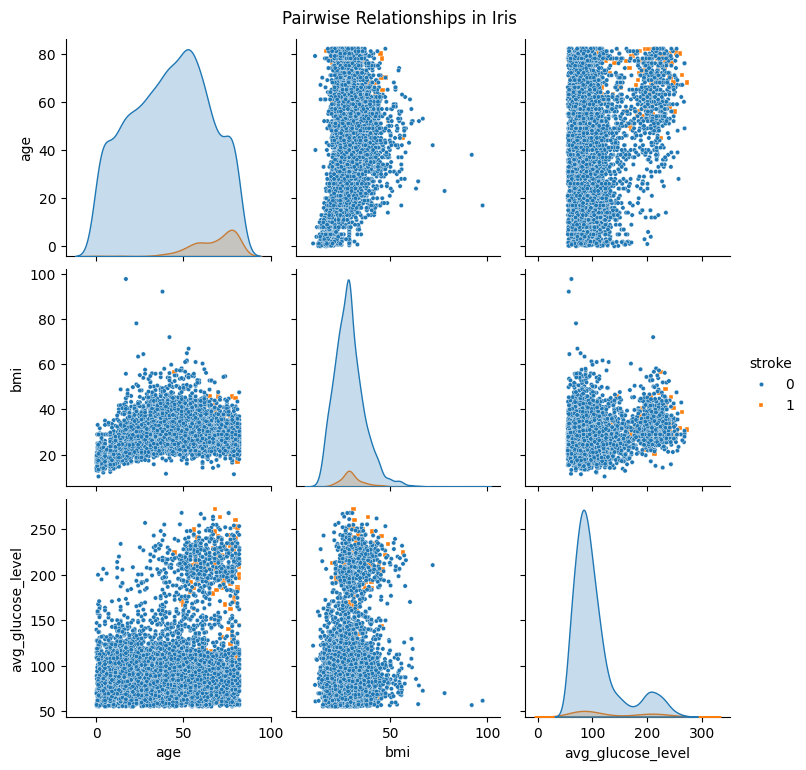

In [19]:
sns.pairplot(
    df_pairplot,
    hue="stroke",      
    diag_kind="kde",      
    markers=["o", "s"], plot_kws={'s': 10}
)
plt.suptitle("Pairwise Relationships in Iris", y =1.02)
plt.show()

The argument `hue="stroke"` tells `seaborn` which information it hsould use to color the data points. `diag_kind="kde"` will get you kernel density estimation (kde) on the diagonal, `seaborn` also support other types such as histogram. `markers=["o","s"]` will specify what marker shapes you want. Finally, `plot_kws={'s':10}` will set the size of the data point. `sns.pairplot()` returns a `PairGrid` object, that is to say the usual `matplotlib` function `plt.title()` will not work, so we use `plt.suptitle()` to add a title for all subplots at the top.  
If you want more details of the arguments of the function, please check the [seaborn](https://seaborn.pydata.org/index.html) documentation.

Once you have made the pairplot, you will notice that the data points of the '0's are being plotted on top of the '1's. We can solve this by reordering the dataframe like so:

In [20]:
df_pairplot_reordered = pd.concat([df_pairplot[df_pairplot['stroke'] == 0],
                                   df_pairplot[df_pairplot['stroke'] == 1]]).reset_index(drop=True)

We are subsetting the dataframe into 2, rows with '0's in the 'stroke' column and '1's, then we are merging them together putting '0's first. This way when `seaborn` make the plots, it will display rows with '1's last thus they will be on top.
Now we can make the pairplot again:

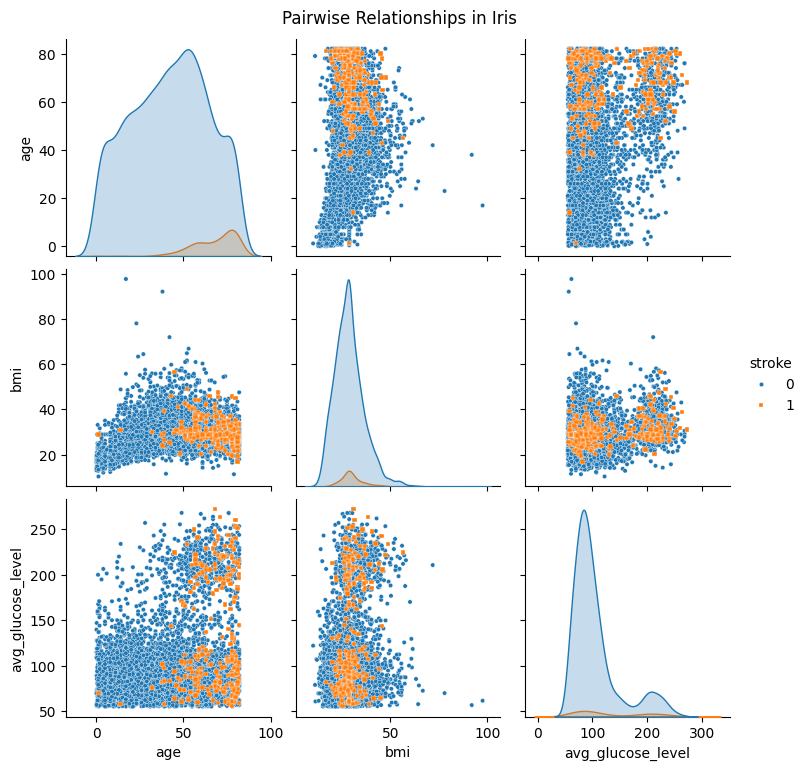

In [21]:
sns.pairplot(
    df_pairplot_reordered,
    hue="stroke",      
    diag_kind="kde",      
    markers=["o", "s"],plot_kws={'s': 10}
)
plt.suptitle("Pairwise Relationships in Iris", y =1.02)
plt.show()

Now the figure looks slightly better.

### Heatmap

If we want a bit more details on their relationships, we can try getting the Pearson correlation. Since we only have 3 columns that are numerical in nature, we will exclude the other columns first by typing:

In [22]:
stroke_numerical = stroke_data.select_dtypes(include=['float64'])

We are selecting columns that with the data type being a 'float', which is a real number with a decimal point. The other columns contain categorical data represented as an 'object' or 'int64', so we will exclude them. We use the function that comes with a `pandas` dataframe object `select_dtypes()` to select only `float64`.

Next, we will use another `pandas` dataframe object function `corr()`. It will compute the pairwise correlation between the the columns that are in the dataframe. If you want more information about `corr()`, please visit the [pandas](https://pandas.pydata.org/docs/index.html). We will leave every argument as default and get the pearson correlations:

In [23]:
correlations_df = stroke_numerical.corr()

We will now visualize the results using a heatmap. This can easily be done with a few lines of code, we will again be using `seaborn` to help us.

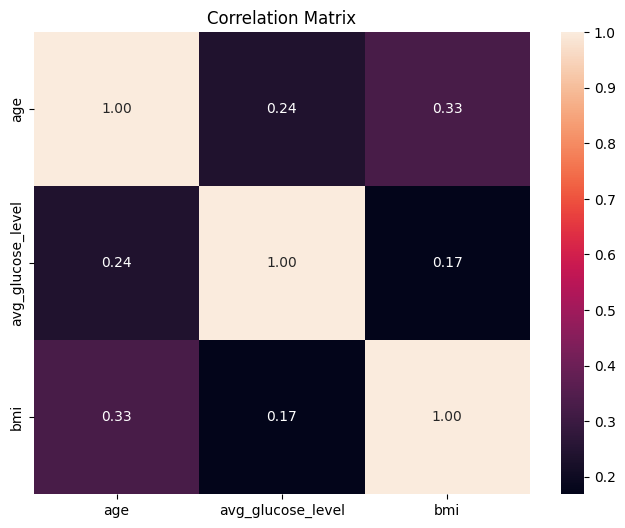

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlations_df,
    annot=True,        # show correlation values in cells
    fmt=".2f",         # format to two decimal places
)
plt.title("Correlation Matrix")
plt.show()

`annot=True` will display the Pearson values in the cells. `fmt=".2f"` will display the values in 2 decimal places. Please check the [seaborn](https://seaborn.pydata.org/index.html) documentation for more details.

## OPTIONAL: Linear regression and line plot

If you think 2 variables have a linear relationship, we can try fitting a linear regression model and make a line plot. We will be using packages `scikit-learn` and `numpy`.

You will have imported `numpy` at the start of this tutorial, let us import the functions that we will use from the `scikit-learn` package:

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

First, we will split the data into training and testing data to avoid overfitting. This is not too important for us because we just want to make some pretty figures! But we will do it anyway for good practice.

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(stroke_data['age'].values, stroke_data['bmi'].values, test_size=20, shuffle=False)

We will now create a linear regression model object and fit the data to it:

In [ ]:
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

`LinearRegression()` from `scikit-learn` will create a model object, then we use a function that comes with the object `fit()` to actually fit the model to the provided data. The `fit()` function takes 2D data as input, so we reshaped our data using the `numpy` function `reshape()` to change the dimension. Typing -1 will tell numpy to infer the dimension of the data without us having to tell it manually, the second argument 1 tells `numpy` we want one column.

Now that we have the fitted model, let us get the predicted values from it and make a line plot. 
We will create some values as the independent variable:

In [ ]:
X_values = np.linspace(0,80,50)

The `np.linspace()` function will create an array with evenly spaced numbers, in our case we specify that we want 50 numbers ranging from 0-80. We can then put `X_values` into the function `predict()` to get the predicted bmi values. 

In [ ]:
predicted_bmi = model.predict(X_values.reshape(-1, 1))

Now we can make a line plot with `matplotlib`:

In [ ]:
plt.plot(X_values, predicted_bmi, label='Regression Line')
plt.xlabel('Age')
plt.ylabel('predicted BMI')
plt.title('Line plot of predicted BMI vs Age')
plt.legend()
plt.show()

We simply use the function `plt.plot()` to make the line. We are also labeling it the 'Regression Line', so that we when use `plt.legend()` the line will be labeled as such in the legend.

We can make a scatter plot and a line plot in the same figure by using `plt.scatter()` and `plt.plot()` back to back.

In [ ]:
plt.scatter(stroke_data['age'], stroke_data['bmi'], label='Data Points', alpha=0.5, s= 10)
plt.plot(X_values, predicted_bmi, label='Regression Line', color='red')
plt.xlabel('Age')
plt.ylabel('predicted BMI')
plt.title('Line plot of predicted BMI vs Age')
plt.legend()
plt.show()

We can also use `seaborn` to make a scatter plot and line plot with fewer lines of code:

In [ ]:
sns.regplot(data=stroke_data, x="age", y="bmi", scatter_kws={'s': 10},  line_kws={'color': 'red'})
plt.title('Line plot of predicted BMI vs Age')
plt.show()

## Conclusion

In this tutorial, you have learned how to visualize data with the `matplotlib` and `seaborn` package. There are other packages available and maybe other ways to make the same figure, but at least now you know the basics. 